In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
bikeStore = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Fabian Dozent\Woche 15 (01.12.2023)\BikeStore.csv")

Aufgaben: First Steps
 
Import Daten 

Übersicht Daten

Datenaufbereitung und - cleaning

In [4]:
bikeStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
#keine fehlende Werte 
#Date muss von Text datetime umformatiert werden
# wo ist Profit kleiner als 0

In [6]:
import pandas as pd
bikeStore['Date'] = pd.to_datetime(bikeStore['Date'])

In [7]:
bikeStore.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
Date,113036,2014-11-23 12:14:55.063519232,2011-01-01 00:00:00,2013-12-22 00:00:00,2014-06-27 00:00:00,2016-01-09 00:00:00,2016-07-31 00:00:00,NaN
Day,113036.0,15.665753,1.0,8.0,16.0,23.0,31.0,8.781567
Year,113036.0,2014.401739,2011.0,2013.0,2014.0,2016.0,2016.0,1.27251
Customer_Age,113036.0,35.919212,17.0,28.0,35.0,43.0,87.0,11.021936
Order_Quantity,113036.0,11.90166,1.0,2.0,10.0,20.0,32.0,9.561857
Unit_Cost,113036.0,267.296366,1.0,2.0,9.0,42.0,2171.0,549.835483
Unit_Price,113036.0,452.938427,2.0,5.0,24.0,70.0,3578.0,922.071219
Profit,113036.0,285.051665,-30.0,29.0,101.0,358.0,15096.0,453.887443
Cost,113036.0,469.318695,1.0,28.0,108.0,432.0,42978.0,884.866118
Revenue,113036.0,754.37036,2.0,63.0,223.0,800.0,58074.0,1309.094674


In [8]:
bikeStore.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,113036,2014-11-23 12:14:55.063519232,2011-01-01 00:00:00,2013-12-22 00:00:00,2014-06-27 00:00:00,2016-01-09 00:00:00,2016-07-31 00:00:00,NaN
Day,113036.0,15.665753,1.0,8.0,16.0,23.0,31.0,8.781567
Year,113036.0,2014.401739,2011.0,2013.0,2014.0,2016.0,2016.0,1.27251
Customer_Age,113036.0,35.919212,17.0,28.0,35.0,43.0,87.0,11.021936
Order_Quantity,113036.0,11.90166,1.0,2.0,10.0,20.0,32.0,9.561857
Unit_Cost,113036.0,267.296366,1.0,2.0,9.0,42.0,2171.0,549.835483
Unit_Price,113036.0,452.938427,2.0,5.0,24.0,70.0,3578.0,922.071219
Profit,113036.0,285.051665,-30.0,29.0,101.0,358.0,15096.0,453.887443
Cost,113036.0,469.318695,1.0,28.0,108.0,432.0,42978.0,884.866118
Revenue,113036.0,754.37036,2.0,63.0,223.0,800.0,58074.0,1309.094674


In [9]:
bikeStore.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [10]:
bikeStore.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [11]:
bikeStore.columns.tolist()

['Date',
 'Day',
 'Month',
 'Year',
 'Customer_Age',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

Der BikeStore-Datensatz enthält Informationen über den Verkauf von Fahrrädern und zugehörigen Produkten. Hier ist eine stichpunktartige Erläuterung jeder Spalte:

- **Date:** Das Datum der Bestellung.
- **Day:** Der Tag im Monat der Bestellung.
- **Month:** Der Monat der Bestellung.
- **Year:** Das Jahr der Bestellung.
- **Customer_Age:** Das Alter des Kunden.
- **Age_Group:** Die Altersgruppe des Kunden, möglicherweise abgeleitet aus dem Alter.
- **Customer_Gender:** Das Geschlecht des Kunden.
- **Country:** Das Land, in dem der Kunde ansässig ist.
- **State:** Der Bundesstaat oder die Region, in dem/der der Kunde lebt.
- **Product_Category:** Die übergeordnete Kategorie des verkauften Produkts (z. B. Fahrräder, Zubehör).
- **Sub_Category:** Eine Unterkategorie des verkauften Produkts (z. B. Mountainbikes, Helme).
- **Product:** Die spezifische Produktbezeichnung.
- **Order_Quantity:** Die Menge des bestellten Produkts.
- **Unit_Cost:** Der Einheitskostenpreis des verkauften Produkts.
- **Unit_Price:** Der Einheitsverkaufspreis des Produkts.
- **Profit:** Der erzielte Gewinn aus dem Verkauf.
- **Cost:** Die Gesamtkosten für die Bestellung.
- **Revenue:** Die Gesamteinnahmen aus der Bestellung vor Abzug der Kosten.

In [12]:
bikeStore.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [13]:
# Ermitteln Sie die Anzahl der fehlenden Werte in jeder Spalte

missing_values = bikeStore.isnull().sum().sort_values(ascending=False)
missing_values

Date                0
Day                 0
Cost                0
Profit              0
Unit_Price          0
Unit_Cost           0
Order_Quantity      0
Product             0
Sub_Category        0
Product_Category    0
State               0
Country             0
Customer_Gender     0
Age_Group           0
Customer_Age        0
Year                0
Month               0
Revenue             0
dtype: int64

**Identifizieren doppelter Werte**

In [14]:
bikeStore.duplicated().sum()

1000

In [15]:
bikeStore.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [16]:
bikeStore.loc[bikeStore.duplicated(keep=False)] #Es wählt alle Zeilen aus, die als Duplikate im gesamten DataFrame identifiziert wurden, unabhängig davon, ob sie zum ersten oder zu späteren Vorkommen eines Duplikats gehören.

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1020,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1090,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1092,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111952,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111954,2015-09-20,20,September,2015,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


Aufgaben Analyse:
 
Welche Analysen könnten für den Geschäftsführer des Bike Stores interessant sein? Führe selbstständig Analysen durch und nutze dabei auch Datenvisualisierungen mit Matplotlib.

#### 1. Umsatz nach Produktkategorien:

**Gesamtumsätze pro Produktkategorie**


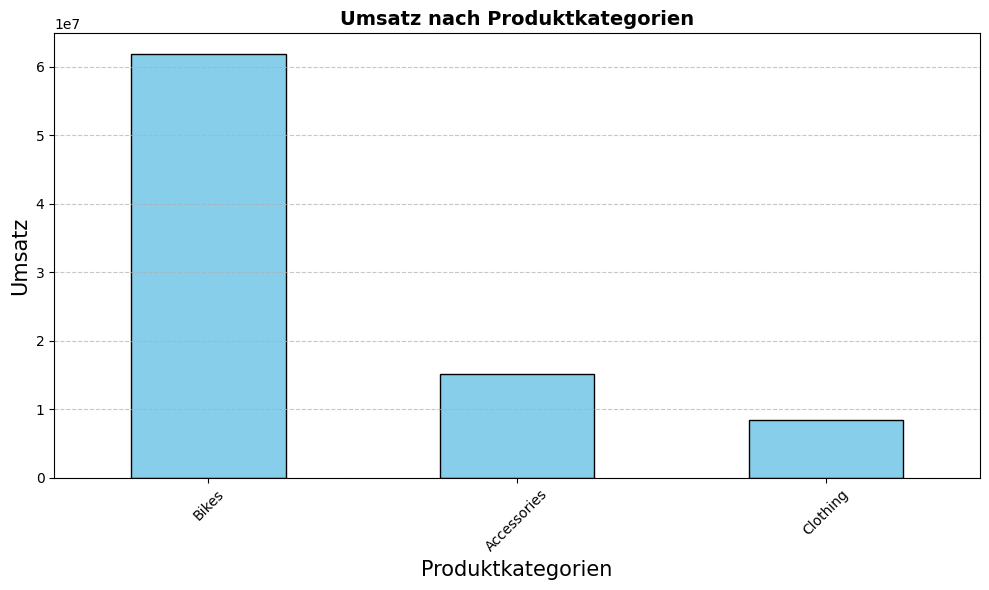

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


sales_by_category = bikeStore.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Umsatz nach Produktkategorien',fontsize = 14, fontweight="bold")
plt.xlabel('Produktkategorien',fontsize = 15)
plt.ylabel('Umsatz', fontsize = 15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
sales_by_category

Product_Category
Bikes          61782134
Accessories    15117992
Clothing        8370882
Name: Revenue, dtype: int64

 #### 2. Regionale Umsatzverteilung:

 **Umsatzverteilung nach Länder**


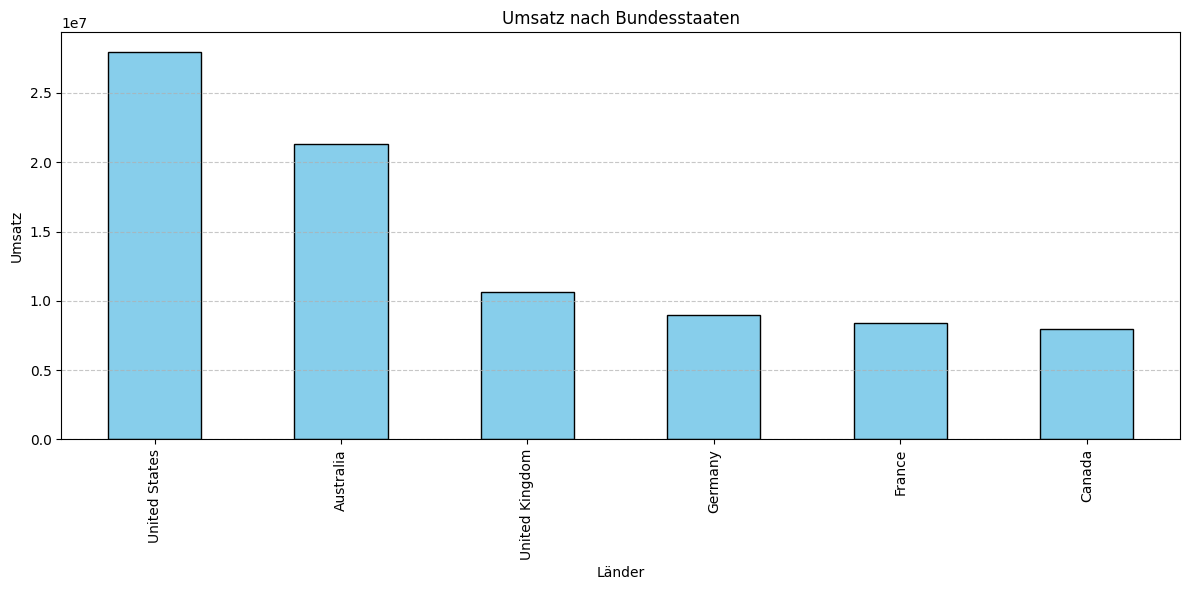

In [19]:
sales_by_state_top10 = bikeStore.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sales_by_state_top10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Umsatz nach Bundesstaaten')
plt.xlabel('Länder')
plt.ylabel('Umsatz')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 **Umsatzverteilung nach Bundesstaaten**


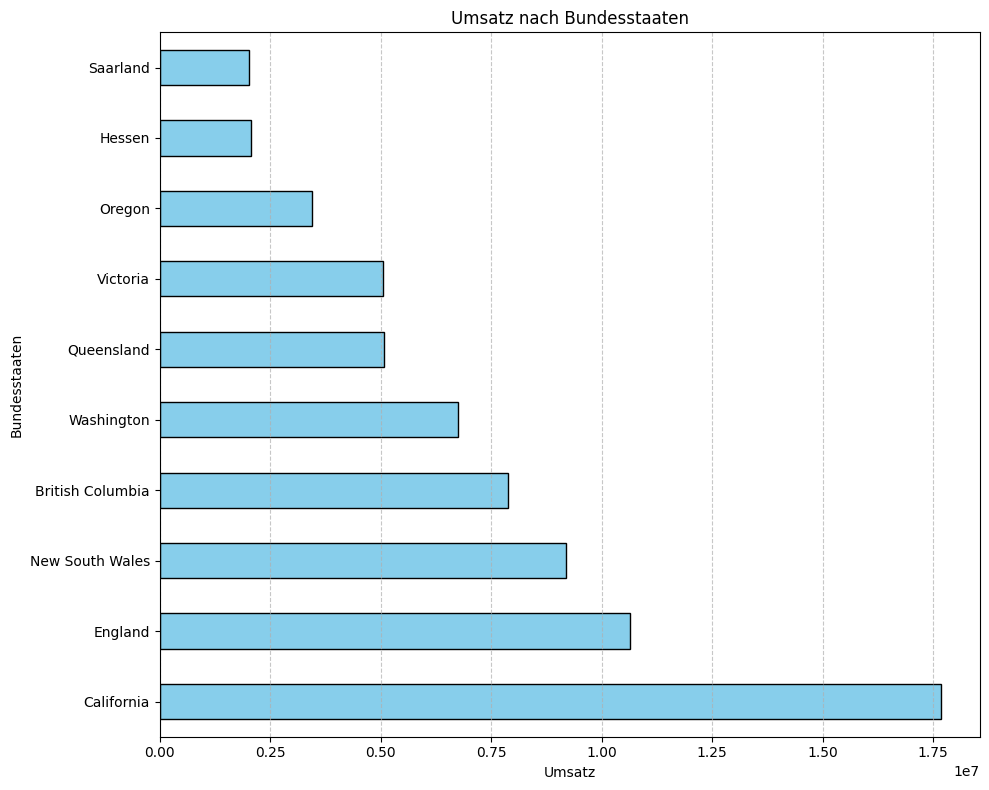

In [20]:
sales_by_state = bikeStore.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
sales_by_state.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Umsatz nach Bundesstaaten')
plt.xlabel('Umsatz')
plt.ylabel('Bundesstaaten')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 3. Kundenanalyse:

**Kaufverhaltens nach Altersgruppen**

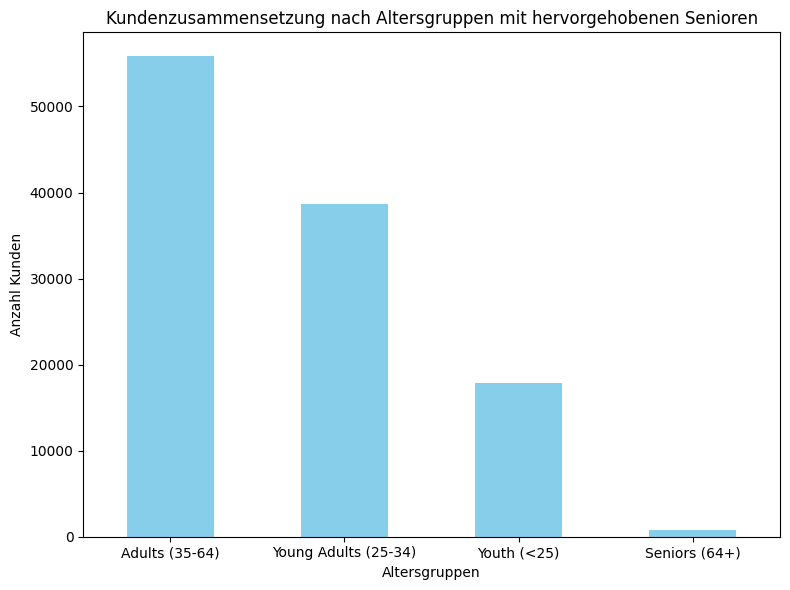

In [35]:
customer_age_groups = bikeStore['Age_Group'].value_counts()

plt.figure(figsize=(8, 6))

highlight = ['skyblue']

customer_age_groups.plot(kind='bar', color=highlight)
plt.title('Kundenzusammensetzung nach Altersgruppen mit hervorgehobenen Senioren')
plt.xlabel('Altersgruppen')
plt.ylabel('Anzahl Kunden')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()


In [22]:
customer_age_groups

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

**Kaufverhalten nach Altersgruppen und Geschlecht**


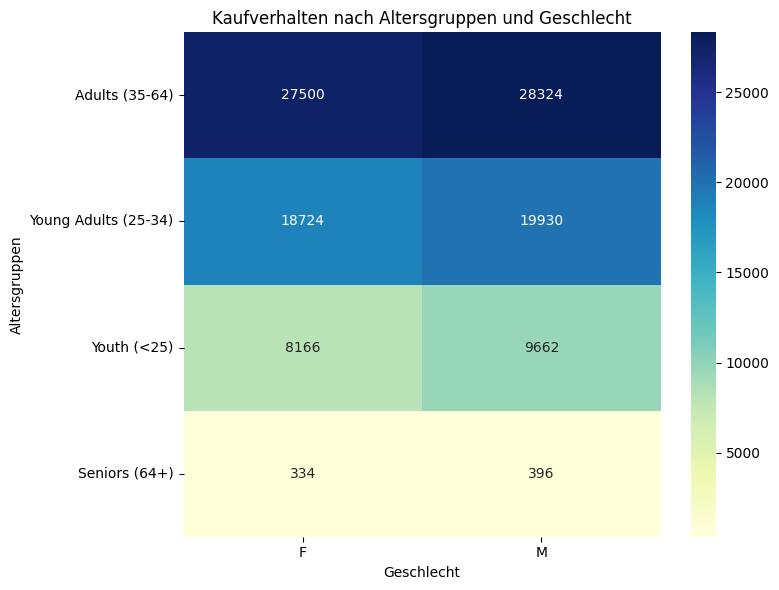

In [23]:
purchase_behavior = pd.crosstab(bikeStore['Age_Group'], bikeStore['Customer_Gender']) #um eine Kreuztabelle zu erstellen
purchase_behavior_sprted = purchase_behavior.sort_values("M", ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(purchase_behavior_sprted, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Kaufverhalten nach Altersgruppen und Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Altersgruppen')
plt.tight_layout()
plt.show()


In [24]:
purchase_behavior

Customer_Gender,F,M
Age_Group,,
Adults (35-64),27500,28324
Seniors (64+),334,396
Young Adults (25-34),18724,19930
Youth (<25),8166,9662


#### 4. Gewinnmargenanalyse:
**Gewinnmargen nach Produktkategorien**

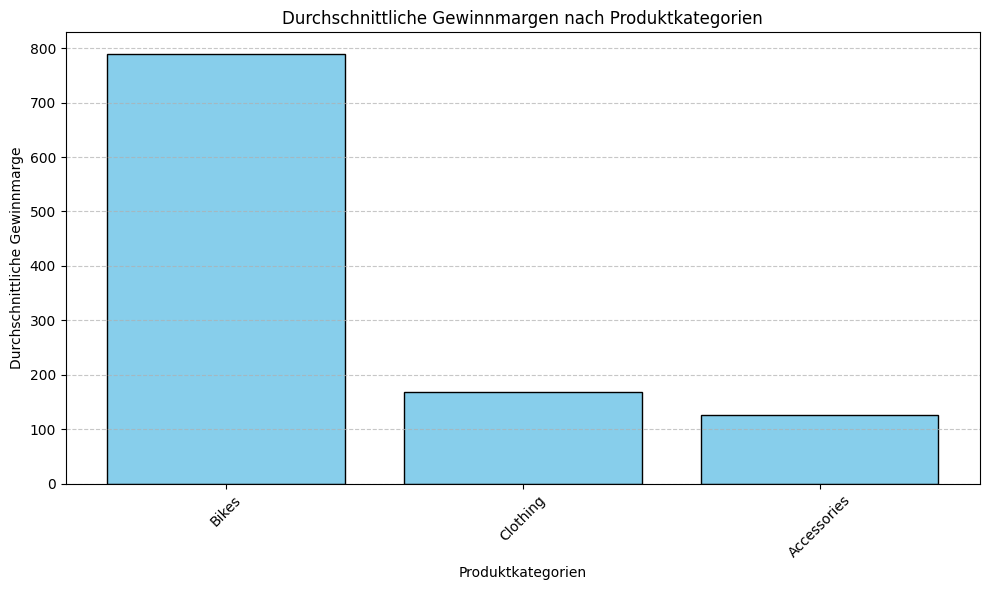

In [25]:
import matplotlib.pyplot as plt

profit_by_category = bikeStore.groupby('Product_Category')['Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(profit_by_category.index, profit_by_category.values, color='skyblue', edgecolor='black')
plt.title('Durchschnittliche Gewinnmargen nach Produktkategorien')
plt.xlabel('Produktkategorien')
plt.ylabel('Durchschnittliche Gewinnmarge')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
profit_by_category

Product_Category
Bikes          789.749673
Clothing       167.677276
Accessories    126.388719
Name: Profit, dtype: float64

#### 5. Funktion zur Umwandlung von Monaten in Jahreszeiten


In [27]:
def season_of_month(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Frühling'
    elif month in ['June', 'July', 'August']:
        return 'Sommer'
    elif month in ['September', 'October', 'November']:
        return 'Herbst'

bikeStore['Saison der Monate'] = bikeStore['Month'].apply(season_of_month)

season_purchase_profit = bikeStore.groupby('Saison der Monate').agg({'Order_Quantity': 'sum', 'Profit': 'sum'}).reset_index()

print(season_purchase_profit)

  Saison der Monate  Order_Quantity   Profit
0          Frühling          355267  8953522
1            Herbst          320156  6939486
2            Sommer          321497  7737537
3            Winter          348396  8590555


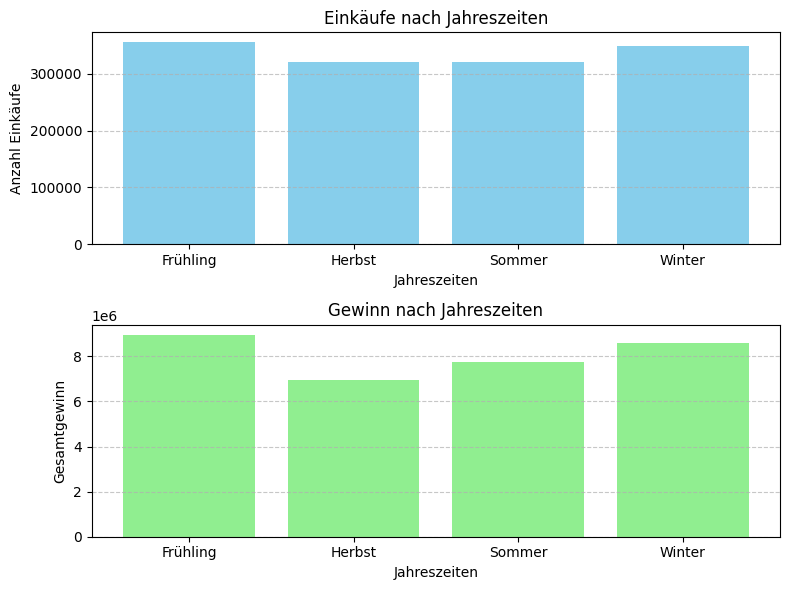

In [28]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.bar(season_purchase_profit['Saison der Monate'], season_purchase_profit['Order_Quantity'], color='skyblue')
plt.title('Einkäufe nach Jahreszeiten')
plt.xlabel('Jahreszeiten')
plt.ylabel('Anzahl Einkäufe')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.bar(season_purchase_profit['Saison der Monate'], season_purchase_profit['Profit'], color='lightgreen')
plt.title('Gewinn nach Jahreszeiten')
plt.xlabel('Jahreszeiten')
plt.ylabel('Gesamtgewinn')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


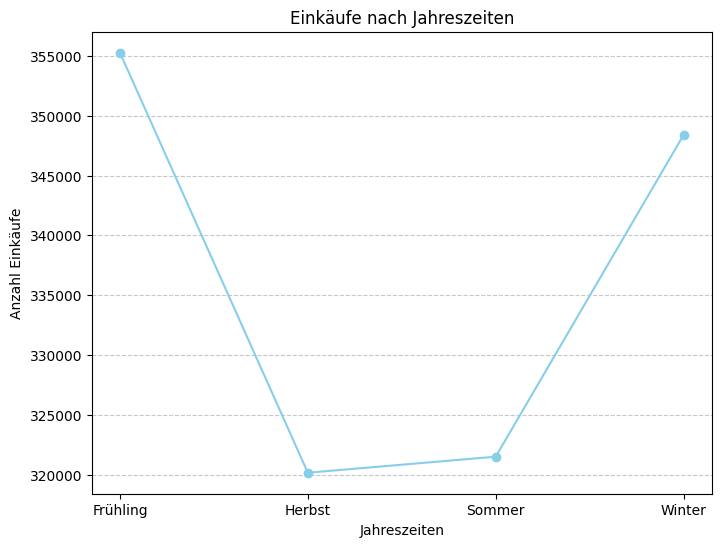

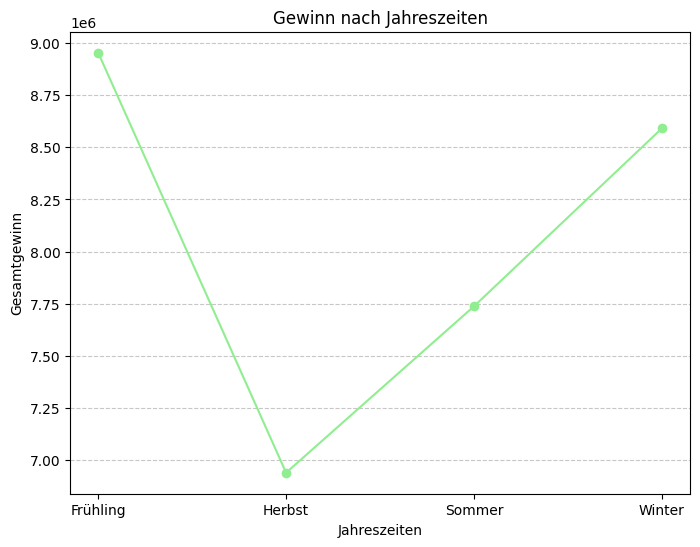

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(season_purchase_profit['Saison der Monate'], season_purchase_profit['Order_Quantity'], marker='o', color='skyblue')
plt.title('Einkäufe nach Jahreszeiten')
plt.xlabel('Jahreszeiten')
plt.ylabel('Anzahl Einkäufe')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(season_purchase_profit['Saison der Monate'], season_purchase_profit['Profit'], marker='o', color='lightgreen')
plt.title('Gewinn nach Jahreszeiten')
plt.xlabel('Jahreszeiten')
plt.ylabel('Gesamtgewinn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Meiste Einkäufe im Land nach Altersgruppe und Geschlecht

<Figure size 1000x600 with 0 Axes>

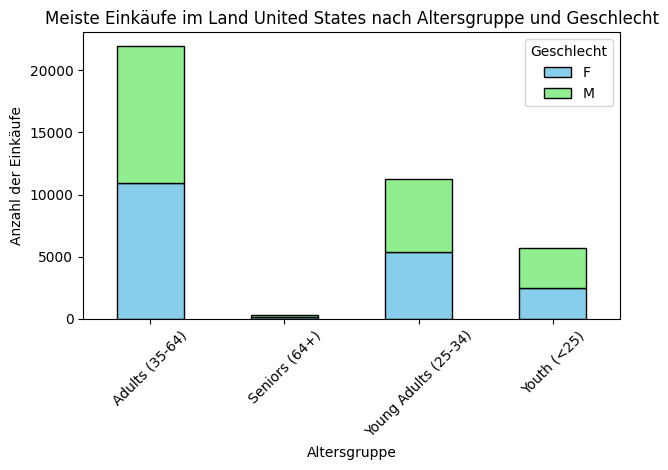

In [30]:
purchase_by_country_age_gender = bikeStore.groupby(['Country', 'Age_Group', 'Customer_Gender']).size().reset_index(name='Purchase_Count')

most_purchased_country = purchase_by_country_age_gender.groupby('Country')['Purchase_Count'].sum().idxmax()

data_most_purchased_country = purchase_by_country_age_gender[purchase_by_country_age_gender['Country'] == most_purchased_country]

plt.figure(figsize=(10, 6))

pivot_data = data_most_purchased_country.pivot_table(index='Age_Group', columns='Customer_Gender', values='Purchase_Count', fill_value=0)
pivot_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

plt.title(f'Meiste Einkäufe im Land {most_purchased_country} nach Altersgruppe und Geschlecht')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl der Einkäufe')
plt.xticks(rotation=45)
plt.legend(title='Geschlecht')

plt.tight_layout()
plt.show()


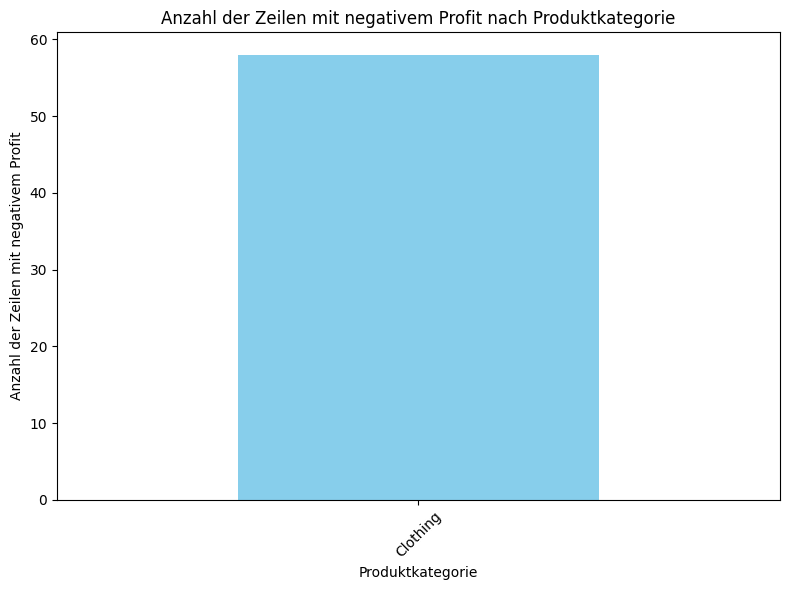

In [31]:
import matplotlib.pyplot as plt

negative_profit = bikeStore[bikeStore['Profit'] < 0]

negative_profit_count = negative_profit.groupby('Product_Category').size()

plt.figure(figsize=(8, 6))
negative_profit_count.plot(kind='bar', color='skyblue')
plt.title('Anzahl der Zeilen mit negativem Profit nach Produktkategorie')
plt.xlabel('Produktkategorie')
plt.ylabel('Anzahl der Zeilen mit negativem Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


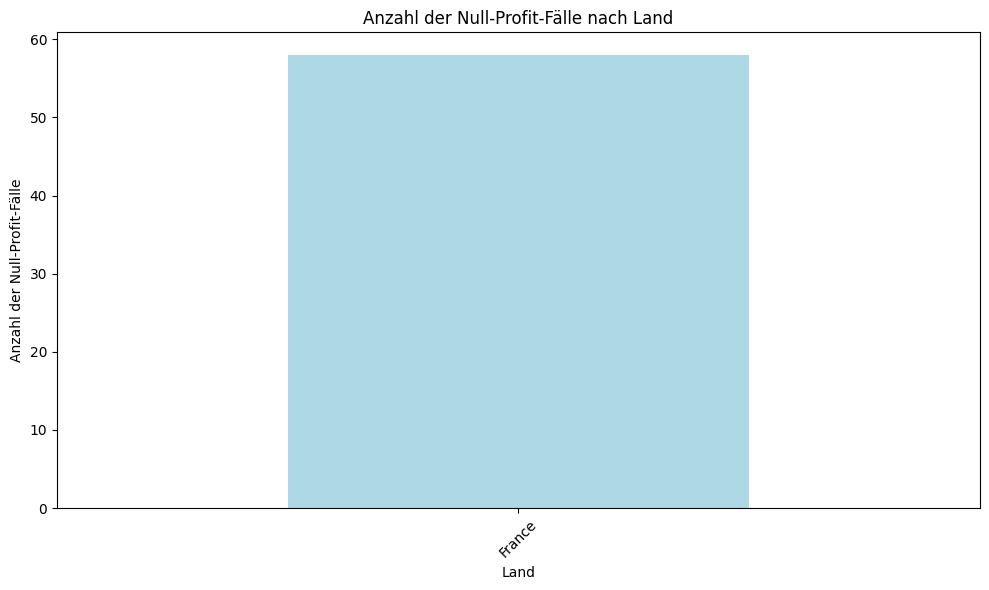

In [32]:
import matplotlib.pyplot as plt

zero_profit = bikeStore[bikeStore['Profit'] < 0]

zero_profit_count = zero_profit.groupby('Country').size() #zählt sie die Anzahl der Zeilen oder Einträge für jedes einzigartige Land in Ihrem DataFrame

plt.figure(figsize=(10, 6))
zero_profit_count.plot(kind='bar', color='lightblue')
plt.title('Anzahl der Null-Profit-Fälle nach Land')
plt.xlabel('Land')
plt.ylabel('Anzahl der Null-Profit-Fälle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


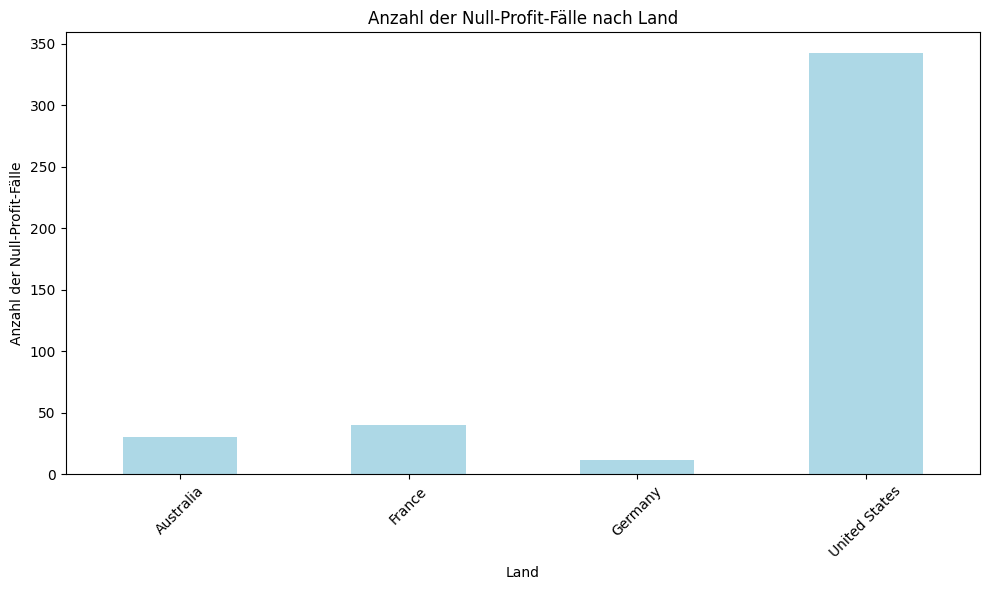

In [33]:
import matplotlib.pyplot as plt

zero_profit = bikeStore[bikeStore['Profit'] == 0]

zero_profit_count = zero_profit.groupby('Country').size() #zählt sie die Anzahl der Zeilen oder Einträge für jedes einzigartige Land in Ihrem DataFrame

plt.figure(figsize=(10, 6))
zero_profit_count.plot(kind='bar', color='lightblue')
plt.title('Anzahl der Null-Profit-Fälle nach Land')
plt.xlabel('Land')
plt.ylabel('Anzahl der Null-Profit-Fälle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Abschließend lässt sich festhalten, dass zwischen dem Umsatz und dem Gewinn von Waren kein signifikanter Unterschied besteht. Beispielsweise war der Verkauf von Fahrrädern hoch und führte auch zu einem hohen Gewinn.

1. Der größte Umsatz wurde in den Vereinigten Staaten, insbesondere im Bundesstaat Kalifornien, erzielt. 

2. Bezüglich der Altersgruppen zeigen sich Menschen zwischen 35 und 64 Jahren als die zahlreichsten Kunden, während Menschen über 64 Jahre, also die sogenannten Rentner, die geringste Kaufkraft aufweisen könnten. Diese geringe Kaufkraft könnte möglicherweise auf ihre eingeschränkte körperliche Fitness und ihre Unfähigkeit, Fahrrad zu fahren, zurückzuführen sein.

3. Geschlechtsspezifisch sind die Unterschiede beim Kaufverhalten gering und nahezu ausgeglichen. Männer und Frauen tätigen in verschiedenen Altersgruppen beträchtliche Einkäufe.

4. Hinsichtlich der Saisonalität zeigen sich kaum große Unterschiede zwischen der Anzahl der Käufe und dem erzielten Gewinn in den verschiedenen Jahreszeiten. Allerdings gibt es während der Herbstsaison eine Verringerung sowohl der Kaufmenge als auch des Gewinns. Im Gegensatz dazu ist die Anzahl der Käufe im Sommer gering, aber der Gewinn ist bedeutend.

5. Des Weiteren verzeichnet ein Bekleidungsprodukt einen negativen Gewinn, vermutlich aufgrund aller Einkäufe dieser Kleidung, die in Frankreich getätigt wurden.

6. Es gab ebenfalls Phasen, in denen der Gewinn in vier Ländern, nämlich in Amerika, Deutschland, Frankreich und Australien, zeitweise bei Null lag.

Natürlich könnten weiterführende Analysen durchgeführt werden, um verschiedene weitere Informationen zu prüfen. Aufgrund von Zeitbeschränkungen konnte ich jedoch nur einige der wichtigeren Aspekte analysieren und zu Schlussfolgerungen gelangen.

Numerical Data



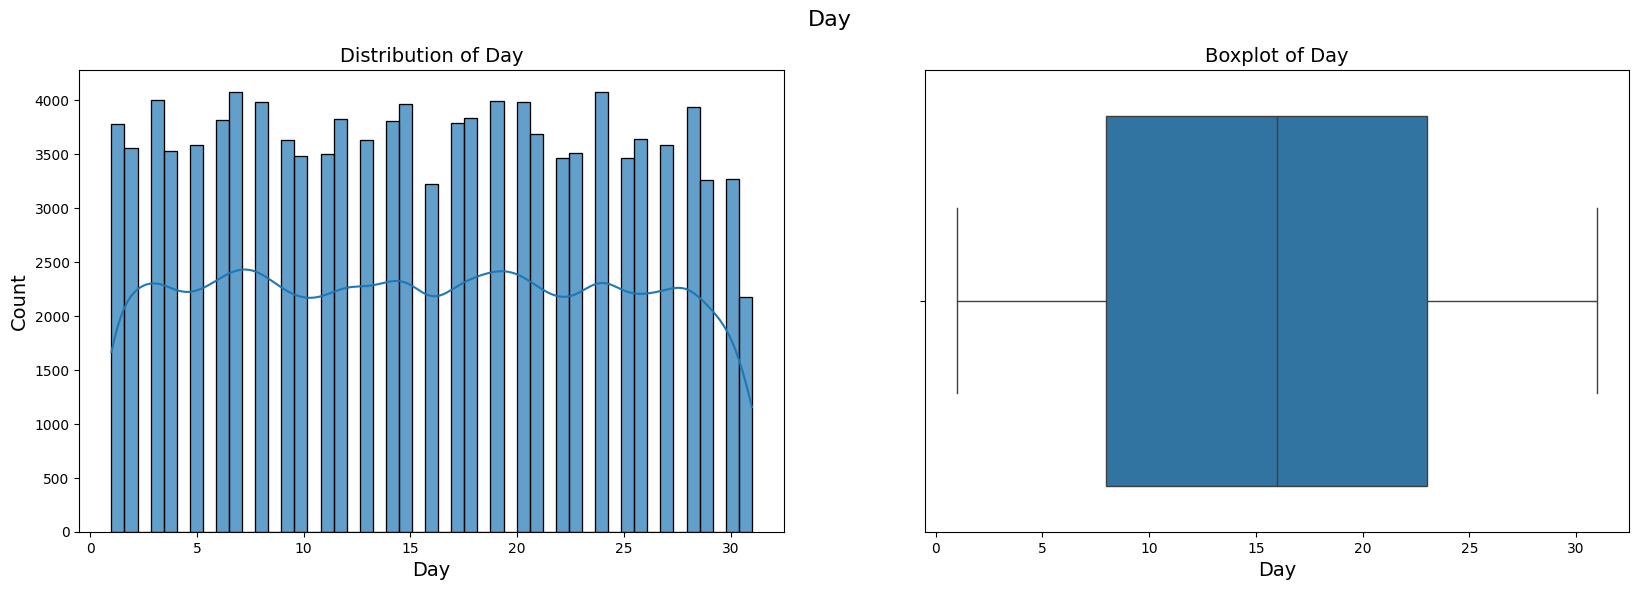

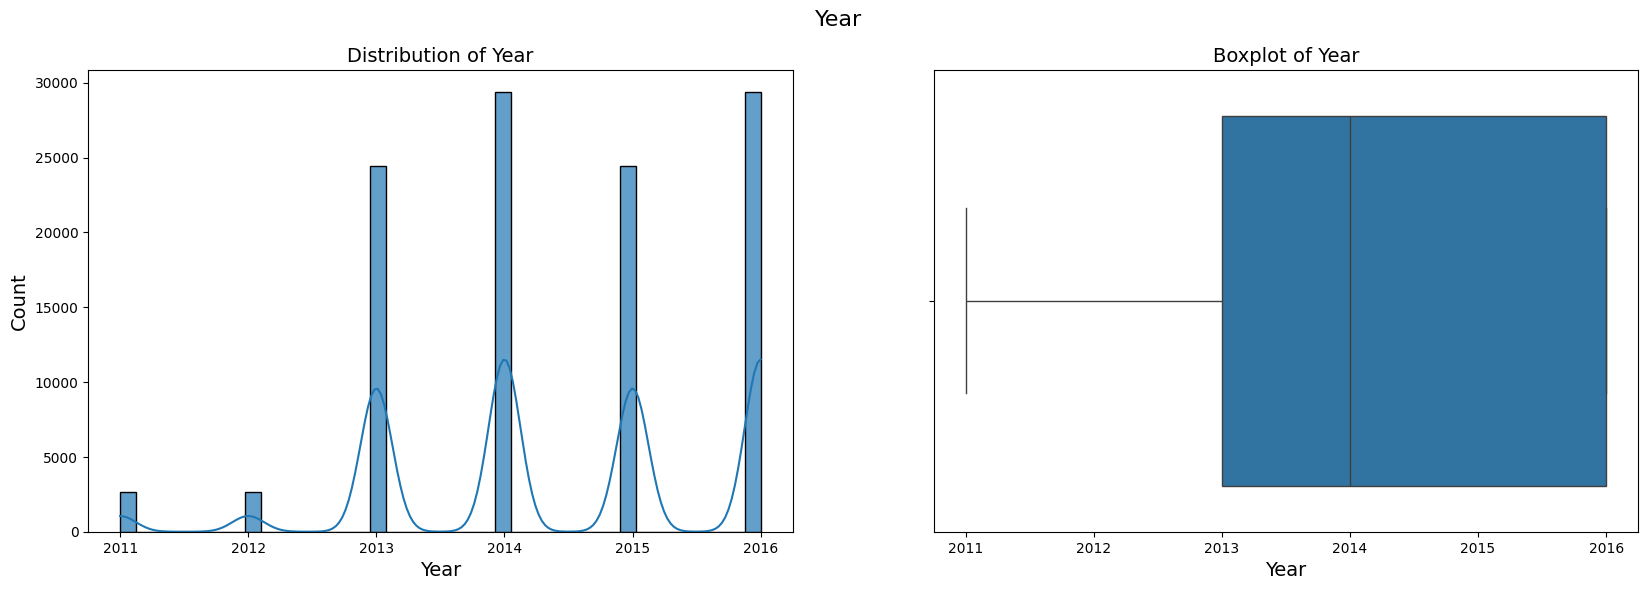

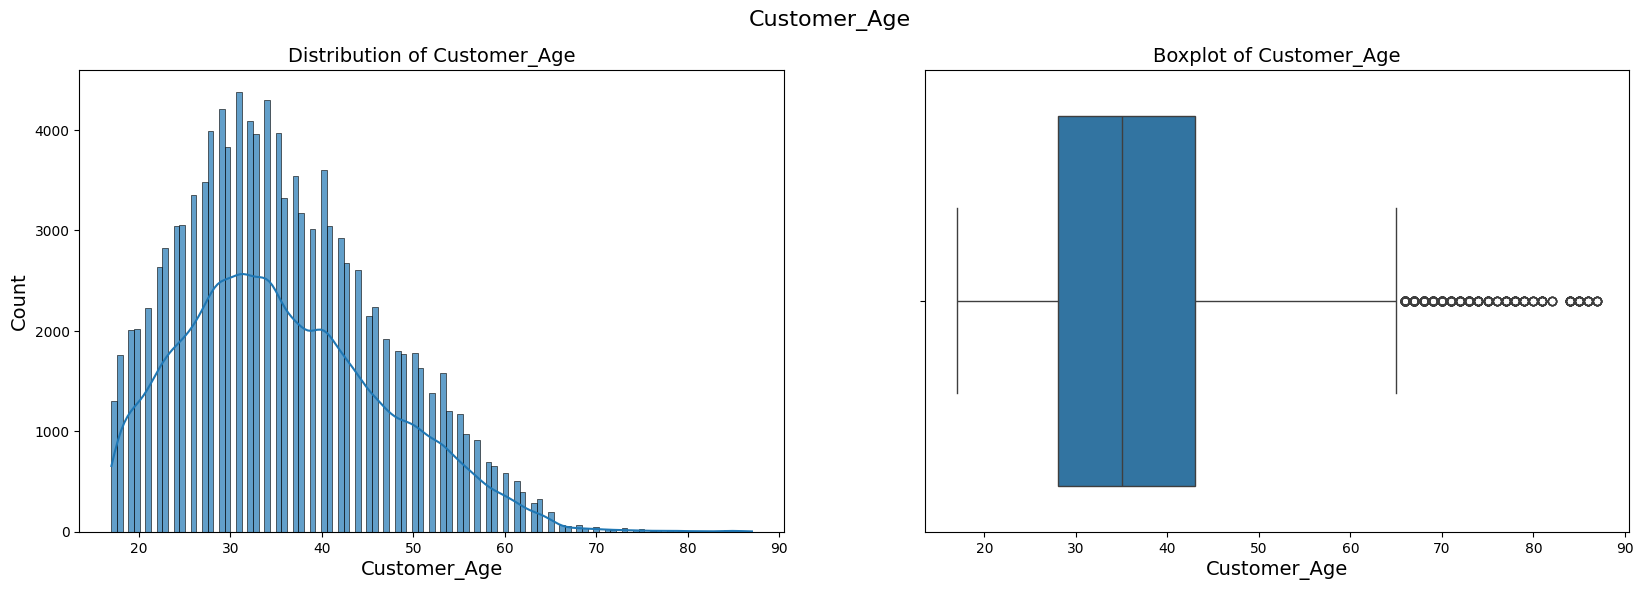

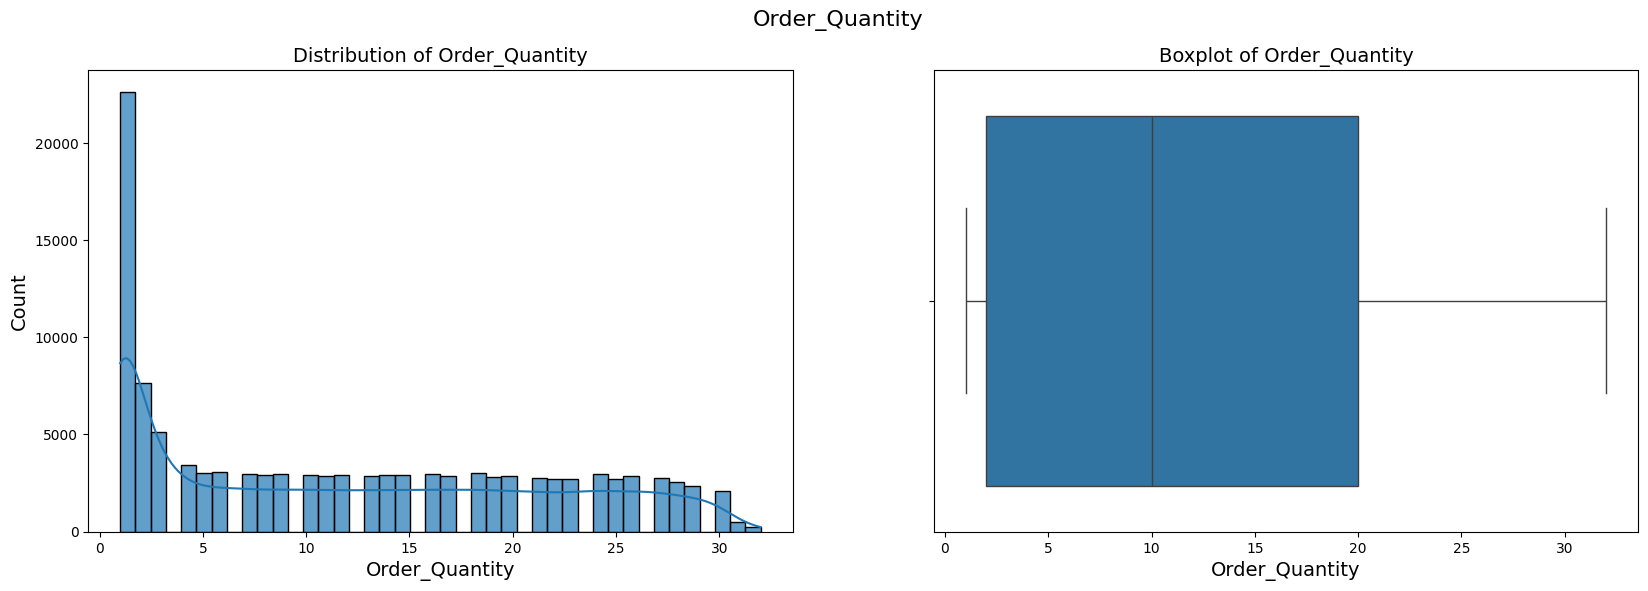

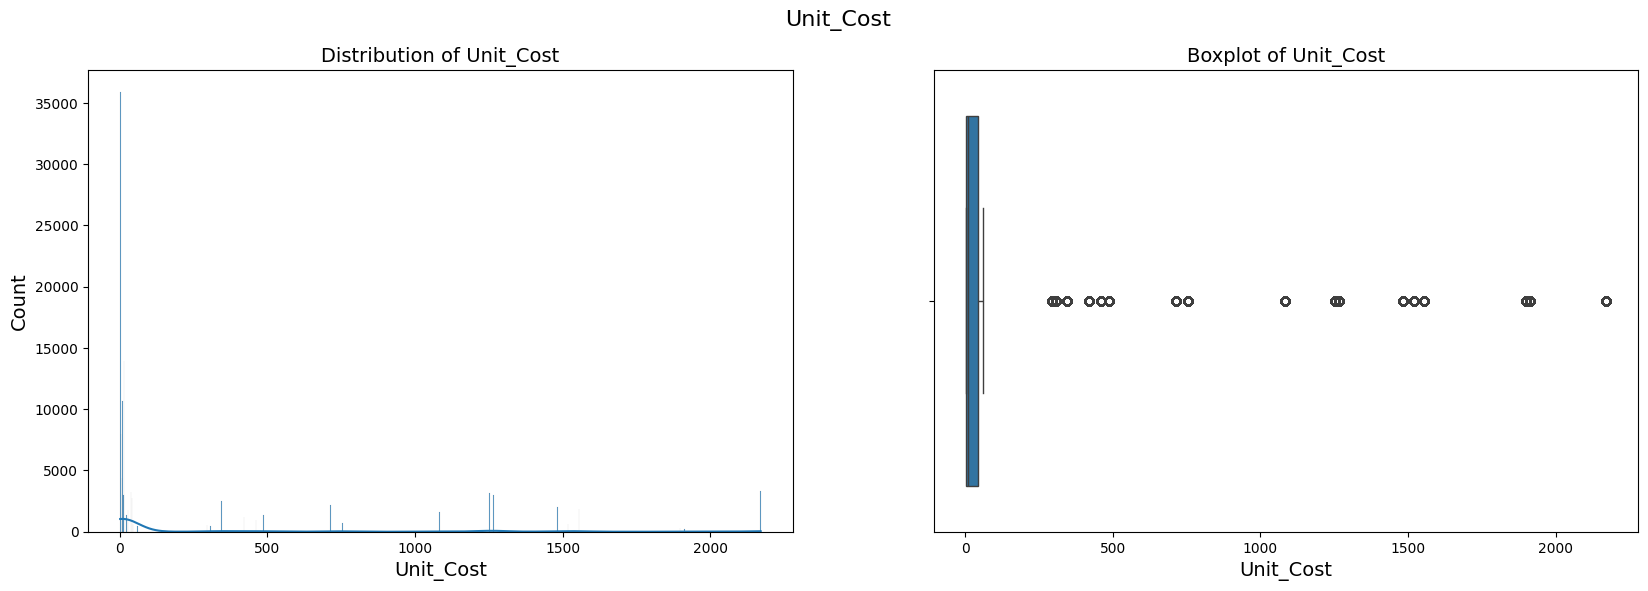

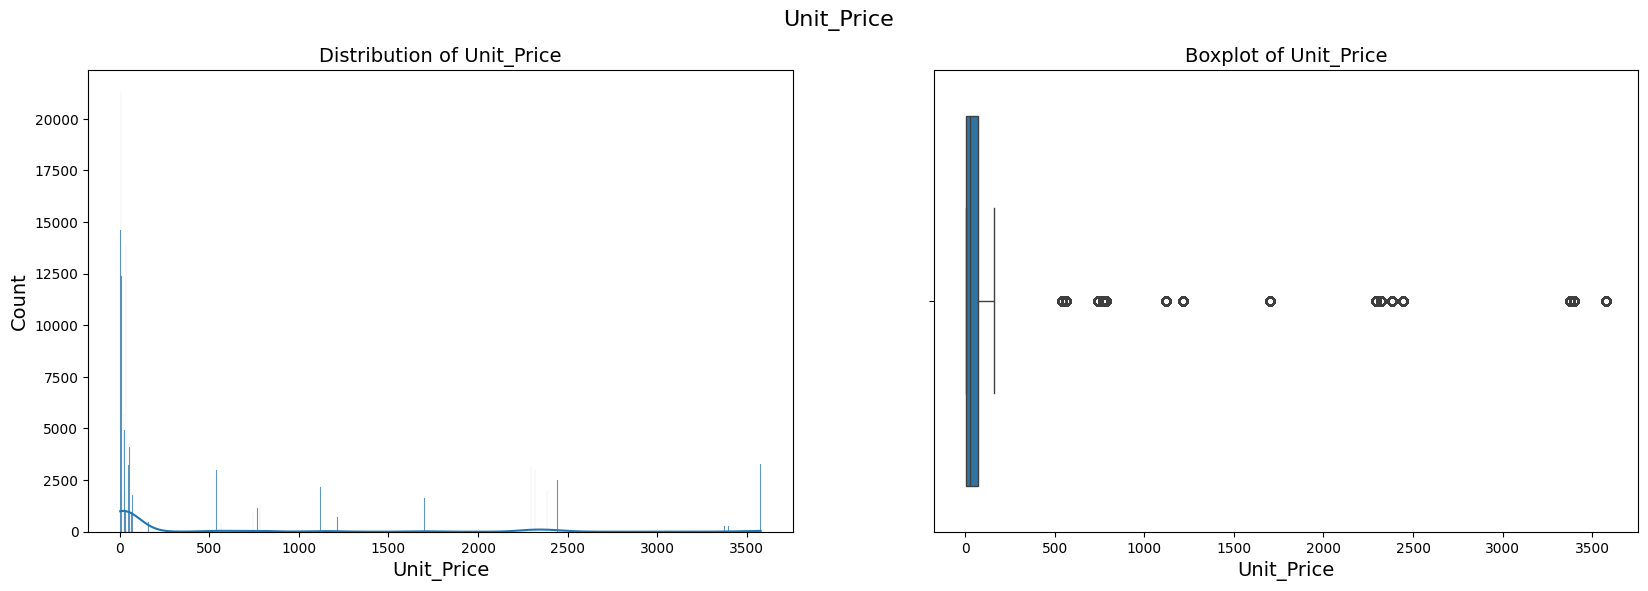

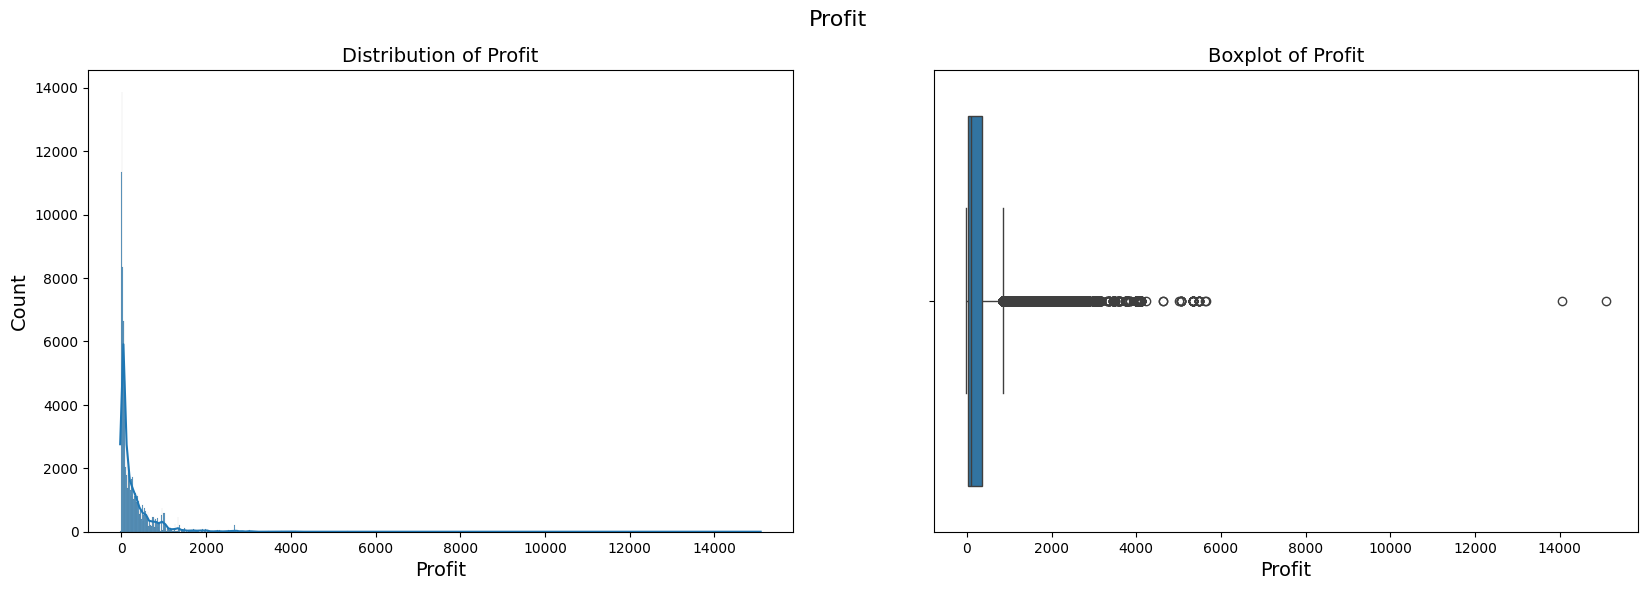

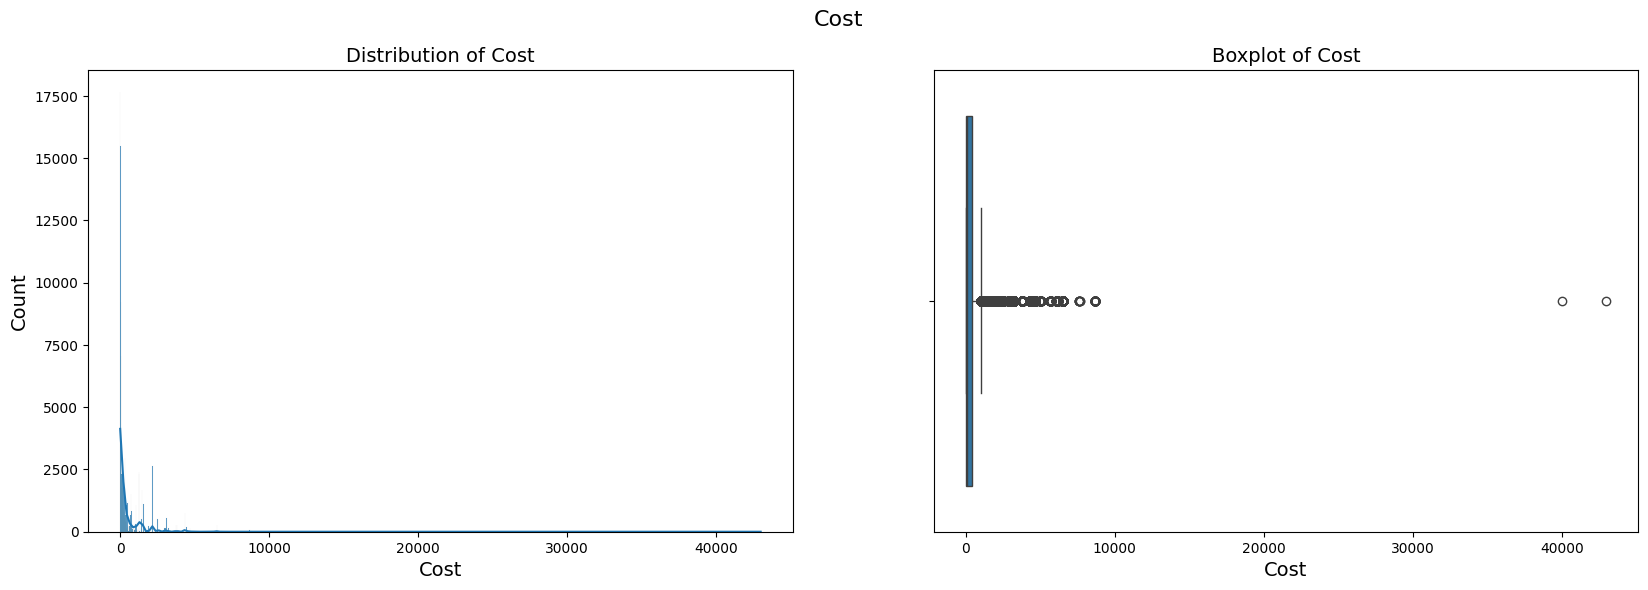

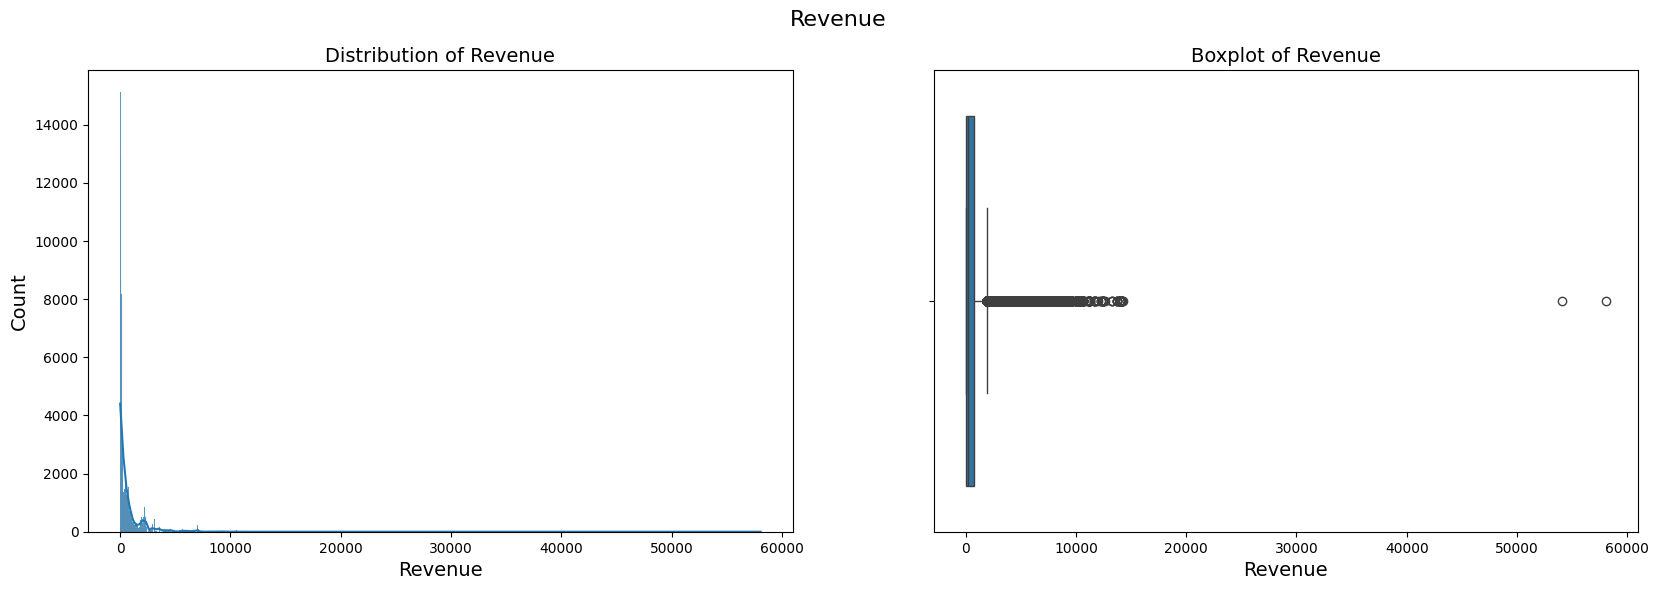

In [34]:
# Plot numerical data
print("Numerical Data\n")
for i in bikeStore.select_dtypes("number").columns:
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    sns.histplot(data=bikeStore[i], ax=ax[0], kde=True, alpha=0.7)
    sns.boxplot(x=bikeStore[i], ax=ax[1]) # x instead of data for horizontal

    fig.suptitle(i, fontsize=16)
    ax[0].set_xlabel(i, fontsize=14)
    ax[0].set_ylabel('Count', fontsize=14)
    ax[0].set_title('Distribution of ' + i, fontsize=14)
    ax[1].set_xlabel(i, fontsize=14)
    ax[1].set_ylabel('')
    ax[1].set_title('Boxplot of ' + i, fontsize=14)

    plt.show()